In [1]:
# Import 3rd party libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the three weather data files from 0-Raw_data
# Note that the second row contains the header names in the csv files

weather_data_2019 =  pd.read_csv(r"C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\weather_data_2019.csv", header=[1])
weather_data_2020 =  pd.read_csv(r"C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\weather_data_2020.csv", header=[1])
weather_data_2021 =  pd.read_csv(r"C:\Users\user\PycharmProjects\CIV1498Project2\0-Raw_data\weather_data_2021.csv", header=[1])

# View head and tail of weather data file
print(weather_data_2021.head(10))
print(weather_data_2021.tail(10))

         Date      Time TEMP_MEAN WDIR_VECT WDIR_UVEC WSPD_SCLR HUMIDITY
0         NaN       NaN        °C      Deg.      Deg.       m/s     % RH
1  12/31/2020  24:00 AM      -5.3     290.3     304.5       1.3     77.5
2    1/1/2021   1:00 AM        -7     302.1     317.8       0.9     83.7
3    1/1/2021   2:00 AM      -8.8     286.8     301.3       0.6     87.7
4    1/1/2021   3:00 AM      -9.2      57.9      15.7       0.5     89.1
5    1/1/2021   4:00 AM      -8.3       283     285.5       0.9     87.6
6    1/1/2021   5:00 AM      -7.4     107.4     104.1         1     87.5
7    1/1/2021   6:00 AM      -6.9      82.2      79.4       1.1     89.9
8    1/1/2021   7:00 AM      -6.1      76.2      75.5       1.4     91.9
9    1/1/2021   8:00 AM      -5.9        72      72.5       1.1     92.2
          Date      Time        TEMP_MEAN        WDIR_VECT        WDIR_UVEC  \
8783  1/1/2022  10:00 PM            -18.5            344.1            349.6   
8784  1/1/2022  11:00 PM            -21

We can see that the last 8 rows of the dataframe contains statistical information rather than hourly measurements.
The first row of the dataframe contains the unit of measurement for each column rather than hourly measurements.
The first column contains the data and the second column contains the time of measurement.

In [3]:
def clean_weather_data(df):
    # A function that takes in a raw dataframe of weather data and renames the columns, fixes the data types, combines
    # the date and time columns into a DateTimeIndex and returns the dataframe

    # Rename columns to include unit of measurement
    df.rename(columns={'TEMP_MEAN':'TEMP_MEAN_(C)', 'WDIR_VECT':'WDIR_VECT_(DEG)', 'WDIR_UVEC':'WDIR_UVEC_(DEG)', 'WSPD_SCLR':'WSPD_SCLR_(M/S)', 'HUMIDITY':'HUMIDITY_(%)'}, inplace=True)

    # Drop the first row and the last eight statistical summary rows
    df = df[1:-8]

    # Define datatypes
    df['Date'] = df['Date'].astype(str)
    df['Time'] = df['Time'].astype(str)
    df[['TEMP_MEAN_(C)', 'WDIR_VECT_(DEG)', 'WDIR_UVEC_(DEG)', 'WSPD_SCLR_(M/S)',
        'HUMIDITY_(%)']] = df[['TEMP_MEAN_(C)', 'WDIR_VECT_(DEG)', 'WDIR_UVEC_(DEG)', 'WSPD_SCLR_(M/S)', 'HUMIDITY_(%)']].astype(float)

    # Turn data and time columns into a DateTimeIndex
    format = '%m/%d/%Y %I:%M %p'
    df['Date'] = df[['Date', 'Time']].agg(' '.join, axis =1)
    df['Date'] = df['Date'].str.replace('24:00', '12:00')
    df['Datetime'] = pd.to_datetime(df['Date'].astype("string"), format=format)
    df = df.set_index(pd.DatetimeIndex(df['Datetime']))
    df.drop(['Date', 'Time', 'Datetime'], axis=1, inplace=True)


    return df

In [4]:
# Run weather dataframes through function to clean
weather_data_2019 = clean_weather_data(weather_data_2019)
weather_data_2020 = clean_weather_data(weather_data_2020)
weather_data_2021 = clean_weather_data(weather_data_2021)

# View data frame
weather_data_2021.head()

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WDIR_UVEC_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%)
Datetime,,,,,
2020-12-31 00:00:00,-5.3,290.3,304.5,1.3,77.5
2021-01-01 01:00:00,-7.0,302.1,317.8,0.9,83.7
2021-01-01 02:00:00,-8.8,286.8,301.3,0.6,87.7
2021-01-01 03:00:00,-9.2,57.9,15.7,0.5,89.1
2021-01-01 04:00:00,-8.3,283.0,285.5,0.9,87.6


In [5]:
weather_data_2021.tail(25)

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WDIR_UVEC_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%)
Datetime,,,,,
2021-12-31 23:00:00,-31.0,296.7,297.6,0.3,67.6
2021-12-31 00:00:00,-29.8,104.0,103.9,0.5,69.2
2022-01-01 01:00:00,-29.0,103.9,104.0,0.5,70.0
2022-01-01 02:00:00,-27.8,103.9,100.4,0.8,71.4
2022-01-01 03:00:00,-26.9,102.2,101.8,1.1,72.7
2022-01-01 04:00:00,-26.3,103.2,100.8,0.7,73.5
2022-01-01 05:00:00,-25.4,94.8,92.0,0.9,74.6
2022-01-01 06:00:00,-24.6,93.6,90.3,1.5,75.8
2022-01-01 07:00:00,-23.5,85.8,88.6,1.0,77.9


Now that all years of weather data have been cleaned, they can be combined into one dataframe.
Looking at the head and tail of the dataframes, we can see that some hourly measurements are not within the year specified.
These can be removed to prevent overlap when combining the dataframes

In [6]:
# Remove any hourly measurements that are not part of the year to prevent overlap when combining dataframes
# Filter data between two dates
weather_data_2019 = weather_data_2019.loc[(weather_data_2019.index >= '2019-01-01')
                                          & (weather_data_2019.index < '2020-01-01')]
weather_data_2020 = weather_data_2020.loc[(weather_data_2020.index >= '2020-01-01')
                                          & (weather_data_2020.index < '2021-01-01')]
weather_data_2021 = weather_data_2021.loc[(weather_data_2021.index >= '2021-01-01')
                                          & (weather_data_2021.index < '2022-01-01')]

# Combine all yearly dataframes into one dataframe for the entire period
weather_data = pd.concat([weather_data_2019, weather_data_2020, weather_data_2021], axis=0)

# view dataframe
weather_data.head()

,TEMP_MEAN_(C),WDIR_VECT_(DEG),WDIR_UVEC_(DEG),WSPD_SCLR_(M/S),HUMIDITY_(%)
Datetime,,,,,
2019-01-01 01:00:00,0.8,272.7,273.2,10.0,67.1
2019-01-01 02:00:00,0.8,274.6,275.0,8.8,66.8
2019-01-01 03:00:00,1.2,274.9,274.8,8.4,66.0
2019-01-01 04:00:00,0.7,268.3,268.6,7.7,68.6
2019-01-01 05:00:00,1.1,263.5,263.6,10.4,69.6


In [7]:
# Assess the dataframe for any missing values
print(len(weather_data))
weather_data.isnull().sum()

26304


TEMP_MEAN_(C)      59
WDIR_VECT_(DEG)    84
WDIR_UVEC_(DEG)    84
WSPD_SCLR_(M/S)    84
HUMIDITY_(%)       55
dtype: int64

We can see that all columns are missing some data points.

Temperature: 0.22% missing values
Wind Direction: 0.32% missing values
Wind Direction: 0.32% missing values
Wind Speed: 0.32% missing values
Humidity: 0.21% missing values

As these values represent only a very small portion of measurements, they will be filled using linear interpolation.

In [8]:
# interpolate linearly using the value before and after the NaN
weather_data.interpolate(method='linear', inplace=True)

# Check to make sure all NaN values have been filled
weather_data.isnull().sum()


TEMP_MEAN_(C)      0
WDIR_VECT_(DEG)    0
WDIR_UVEC_(DEG)    0
WSPD_SCLR_(M/S)    0
HUMIDITY_(%)       0
dtype: int64

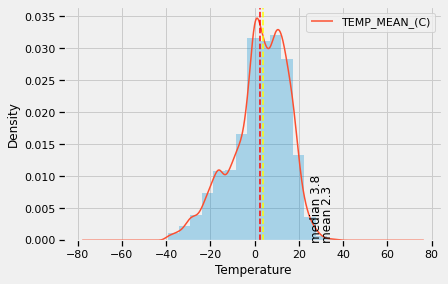

In [9]:
ax = weather_data["TEMP_MEAN_(C)"].hist(bins=15, density=True, stacked=True, alpha=0.3)
weather_data["TEMP_MEAN_(C)"].plot(kind='density')

ax.set(xlabel='Temperature')
plt.axvline(x=weather_data["TEMP_MEAN_(C)"].mean(), color = 'red', ls='--')
plt.axvline(x=weather_data["TEMP_MEAN_(C)"].median(), color = 'yellow', ls='--')
plt.text(30.1,0,'mean {}'.format(round(weather_data["TEMP_MEAN_(C)"].mean(),1)),rotation=90)
plt.text(25.1,0,'median {}'.format(round(weather_data["TEMP_MEAN_(C)"].median(),1)),rotation=90)


plt.legend()
plt.show()

KeyError: "None of [Index(['WDSP_SCLR_(M/S)'], dtype='object')] are in the [columns]"

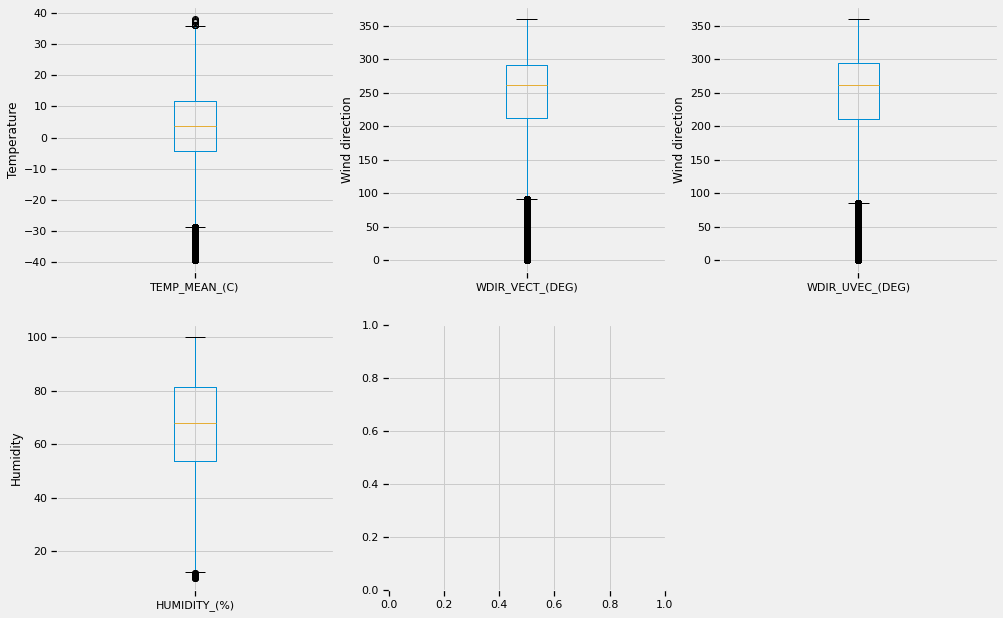

In [10]:
# Check for outliers
plt.figure(figsize=(15,10))


plt.subplot(2, 3, 1)
fig = weather_data.boxplot(column='TEMP_MEAN_(C)')
fig.set_title('')
fig.set_ylabel('Temperature')


plt.subplot(2, 3, 2)
fig = weather_data.boxplot(column='WDIR_VECT_(DEG)')
fig.set_title('')
fig.set_ylabel('Wind direction')


plt.subplot(2, 3, 3)
fig = weather_data.boxplot(column='WDIR_UVEC_(DEG)')
fig.set_title('')
fig.set_ylabel('Wind direction')


plt.subplot(2, 3, 4)
fig = weather_data.boxplot(column='HUMIDITY_(%)')
fig.set_title('')
fig.set_ylabel('Humidity')


plt.subplot(2, 3, 5)
fig = weather_data.boxplot(column='WDSP_SCLR_(M/S)')
fig.set_title('')
fig.set_ylabel('WindSpeed')

Text(0, 0.5, 'Degrees (C)')

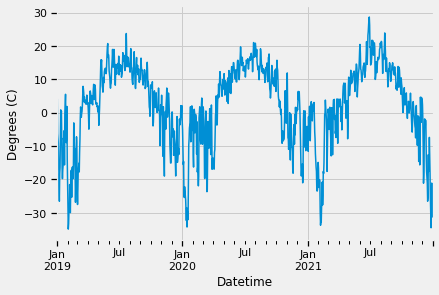

In [11]:
weather_data_daily = weather_data.resample('D').mean()

weather_data_daily['TEMP_MEAN_(C)'].plot.line()
plt.ylabel('Degrees (C)')

In [ ]:
weather_data_daily['WSPD_SCLR_(M/S)'].plot.line()
plt.ylabel('Windspeed (m/s)')

In [ ]:
weather_data_daily['HUMIDITY_(%)'].plot.line()
plt.ylabel('Humidity (%)')

In [14]:
weather_weekly = weather_data.resample('W').mean()
weather_monthly = weather_data.resample('M').mean()

Text(0.5, 1.0, 'Correlation Heatmap using Weather Data Daily')

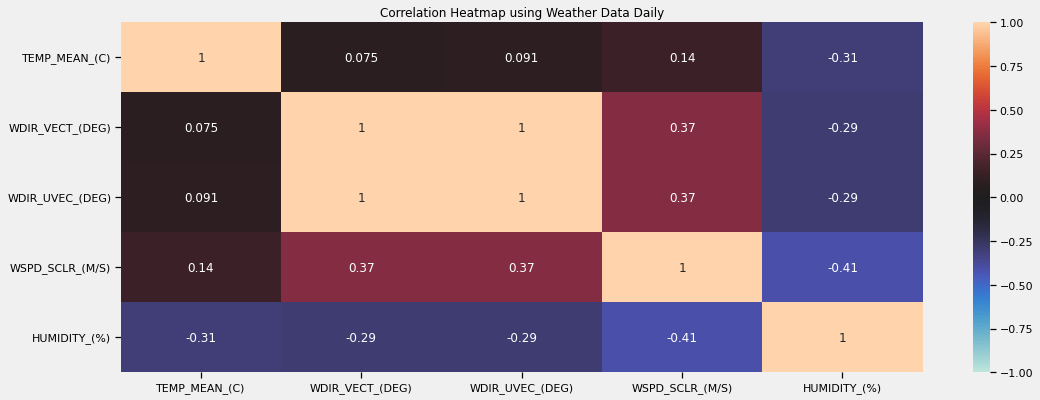

In [15]:
# heat map??
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(weather_weekly.corr(), vmin=-1, vmax=1, annot=True, cmap='icefire')

heatmap.set_title('Correlation Heatmap using Weather Data Daily')

In [ ]:
# save cleaned weather data as a csv
weather_data.to_csv('weather_data_cleaned.csv')